In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

['train.csv', 'sample_submission.csv', 'test.csv']


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_df = pd.read_csv('../input/train.csv')

In [3]:
train_df.shape

(42000, 785)

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1. EDA

In [5]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
feat_cols = train_df.columns.tolist()[1:]
X_train = train_df[feat_cols]
y_train = train_df['label']

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

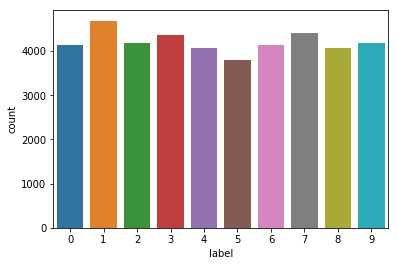

In [7]:
sns.countplot(y_train)
y_train.value_counts()

In [8]:
X_train = X_train / 255
X_train = X_train.values.reshape(-1,28,28,1)
# # Reshape image in 3 dimensions (-1 (pd 자동계산),ght = 28px, width = 28px , canal = 1) = shape(42000, 28, 28, 1)

- We perform a grayscale normalization to reduce the effect of illumination's differences. Moreover the CNN converg faster on [0..1] data than on [0..255].

- Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28 x 28 x 1  3D matrices. **because we will use plt.imshow() to plot image and this function needs hight*width*channel parameters**

In [9]:
X_train.shape

(42000, 28, 28, 1)

- select this 1st image to show out among 42000 images.```X_train[0]```
- plot by using all height & all width & all channels pixels ```[:, :, 0]``` == ```[ 0:27, 0:27, 0]```

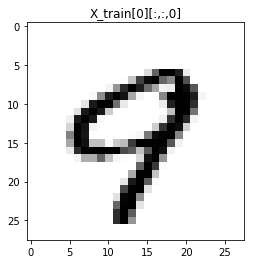

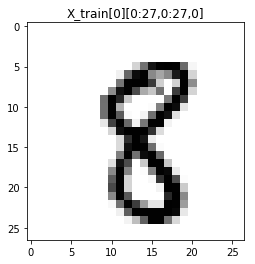

In [10]:
plt.imshow(X_train[100][:,:,0], cmap='Greys')
plt.title('X_train[0][:,:,0]')
plt.show()
plt.imshow(X_train[10101][0:27,0:27,0], cmap='Greys')
plt.title('X_train[0][0:27,0:27,0]')
plt.show()

In [11]:
y_train = pd.get_dummies(y_train, prefix='label')

In [12]:
y_train.shape

(42000, 10)

# 2. modeling

In [13]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.shape

(42000, 28, 28, 1)

In [15]:
y_train.shape

(42000, 10)

In [16]:
feat_cols = train_df.columns.tolist()[1:]
feat_cols[:5]

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4']

In [17]:
X = train_df[feat_cols].values
y = y_train.values
# y = train_df['label'].values.reshape(-1,1)
# ValueError: Cannot feed value of shape (128,) for Tensor 'labels_1:0', which has shape '(128, 1)'

In [18]:
X.shape

(42000, 784)

In [19]:
y.shape

(42000, 10)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/5,random_state=10)

In [21]:
X_test.shape

(8400, 784)

In [22]:
y_test.shape

(8400, 10)

In [23]:
learning_rate = 0.01
batch_size = 128
n_epochs = 30

In [24]:
# feat_inputs = tf.placeholder(dtype=tf.float32,shape=(batch_size, 784),name='feat_inputs')
feat_inputs = tf.placeholder(dtype=tf.float32,shape=(batch_size, 784),name='feat_inputs')

# labels = tf.placeholder(tf.int32, (batch_size,1), name='labels') 
labels = tf.placeholder(tf.int32, (batch_size,10), name='labels') 

# ValueError: Cannot feed value of shape (128,) for Tensor 'labels_1:0', which has shape '(128, 1)'

In [25]:
w = tf.Variable(tf.random_normal(shape=[784,10], stddev=1), name='weights')
b = tf.Variable(tf.zeros(shape=[1,10]), name='bias')

In [26]:
logits = tf.matmul(feat_inputs,w) + b

In [27]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels, name='loss')
loss = tf.reduce_mean(entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
feat_inputs = X_train.values[:128,:]
feat_inputs.shape

In [ ]:
batch_size = 128
batch_size_start = 0
for batch in range(3):
    batch_size_end = (batch+1)*batch_size
    feat_inputs = X_train[batch_size_start:batch_size_end,:]
    labels = y_train[batch_size_start:batch_size_end].reshape(batch_size,1)
    batch_size_start += batch_size        

    print(feat_inputs.shape)
    print(feat_inputs.dtype)
    print(feat_inputs.astype(np.float32).dtype)
#     print(labels)
    print(labels.dtype)
    print(labels.astype(np.int32).dtype)
    print(labels.shape)
    print('-----------')

In [29]:
with tf.name_scope('summaries'):   
    tf.summary.scalar('loss',loss)
    merged_summaries = tf.summary.merge_all()

with tf.Session() as sess:
    # visualization on tensorboard
    writer = tf.summary.FileWriter('./mnist_graph', sess.graph, filename_suffix='_Ex2_MNIST')
#     start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(X_train.shape[0]/batch_size)
    
#     batch_size_start = 0
    """
    #     batch_size_start = 0 need to be commmented.
    ValueError: Cannot feed value of shape (0, 784) for Tensor 'feat_inputs:0', which has shape '(128, 784)'
    through ```Average loss for epoch 0: 300.39718610457794```,we can find that the first epoch is successful
    so, the shape of feat_inputs_batch and labels_batch are right.
    the problem happens the 2nd epoch, put the initial paras into outer for loop, done! yay!    
    """
    
    for i in range(n_epochs): # train the model n_epochs times
        batch_size_start = 0
        total_loss = 0
        for batch in range(n_batches):
            batch_size_end = (batch+1)*batch_size
            feat_inputs_batch = X_train[batch_size_start:batch_size_end,:].astype(np.float32)
            labels_batch = y_train[batch_size_start:batch_size_end].astype(np.int32)
#             labels_batch.reshape(batch_size,1)
#             TypeError: unhashable type: 'numpy.ndarray'
# ValueError: Cannot feed value of shape (128,) for Tensor 'labels_1:0', which has shape '(128, 1)'
            batch_size_start += batch_size            
#             print(batch, ':', feat_inputs_batch.shape)
#             print(batch, ':', labels_batch.shape)
#             feat_inputs, labels = X_train.next_batch(batch_size) # randomly select batch_size samples in dataset
#     AttributeError: 'DataFrame' object has no attribute 'next_batch'        

            _, loss_batch = sess.run([optimizer, loss], feed_dict={feat_inputs: feat_inputs_batch, labels: labels_batch})
            total_loss += loss_batch
#             print('batch loss: ', loss_batch)
#             print('Total loss: ', total_loss)
        print('Average loss for epoch {}: {}'.format(i, total_loss/n_batches))        
        
#     print('Total running time: {0} seconds'.format(time.time() - start_time))
    print('Amazing We Made it!') # should be around 0.35 after 25 epochs
    
    # test the model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds,1), tf.argmax(labels,1))
    # 这行代码会给我们一组布尔值。为了确定正确预测项的比例，我们可以把布尔值转换成浮点数，然后取平均值。
    # 例如，[True, False, True, True] 会变成 [1,0,1,1] ，取平均值后得到 0.75
    count_of_right_predictions = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) 

    n_batches = int(X_test.shape[0]/batch_size)
    total_correct_preds = 0    
    batch_size_start = 0

    for batch in range(n_batches):
    #         X_batch, Y_batch = mnist.test.next_batch(batch_size)
        batch_size_end = (batch+1)*batch_size
        feat_inputs_batch = X_test[batch_size_start:batch_size_end,:].astype(np.float32)
        labels_batch = y_test[batch_size_start:batch_size_end].astype(np.int32)
        batch_size_start += batch_size     

        count_of_right_predictions_per_batch = sess.run(count_of_right_predictions, feed_dict={feat_inputs: feat_inputs_batch, labels: labels_batch})
        total_correct_preds += count_of_right_predictions_per_batch

    print('Accuracy on the testing sets is: {}'.format(total_correct_preds/X_test.shape[0]))

    writer.close()

Average loss for epoch 0: 318.24509860905073
Average loss for epoch 1: 166.87322961647092
Average loss for epoch 2: 141.02244013866397
Average loss for epoch 3: 128.37997975240228
Average loss for epoch 4: 124.37458167185311
Average loss for epoch 5: 118.50195567298482
Average loss for epoch 6: 121.36155576924331
Average loss for epoch 7: 112.5297476207937
Average loss for epoch 8: 117.04579345324568
Average loss for epoch 9: 105.93613339198454
Average loss for epoch 10: 104.17895283589836
Average loss for epoch 11: 111.7222518156503
Average loss for epoch 12: 111.53750498240231
Average loss for epoch 13: 98.07729574924207
Average loss for epoch 14: 102.45824585980131
Average loss for epoch 15: 105.95527116760952
Average loss for epoch 16: 97.89950229557417
Average loss for epoch 17: 96.28575398903767
Average loss for epoch 18: 99.35170022949917
Average loss for epoch 19: 95.31921407466626
Average loss for epoch 20: 102.24842995359697
Average loss for epoch 21: 97.05621781967979
Averag

In [ ]:
!tensorboard --logdir=./mnist_graph